## Interactive Use of PySpark

- Spark comes with an interactive Python shell in which PySpark is already installed in it. PySpark shell is useful for basic testing and debugging and it is quite powerful. The easiest way to demonstrate the power of PySpark’s shell is to start using it. In this example, you'll load a simple list containing numbers ranging from 1 to 100 in the PySpark shell.

- The most important thing to understand here is that we are not creating any SparkContext object because PySpark automatically creates the SparkContext object named sc, by default in the PySpark shell.

In [1]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sc

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/16 10:09:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/16 10:09:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


<SparkContext master=local[*] appName=pyspark-shell>

In [4]:
# Create a Python list of numbers from 1 to 100 
numb = range(0, 100)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)
spark_data.take(5) # Print the first 5 elements of the RDD

[0, 1, 2, 3, 4]

In [13]:
type(spark_data) # Check the type of the RDD

pyspark.rdd.PipelinedRDD

## Loading data in PySpark shell

- In PySpark, we express our computation through operations on distributed collections that are automatically parallelized across the cluster. In the previous exercise, you have seen an example of loading a list as parallelized collections and in this exercise, you'll load the data from a local file in PySpark shell.

- Remember you already have a SparkContext sc and file_path variable (which is the path to the README.md file) already available in your workspace.

In [5]:
# to load local file into PySpark shell
file_path = 'README.md'
lines = sc.textFile(file_path)

In [7]:
lines.take(5)

[]

### Use of lambda() with map()

- The map() function in Python returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.). The general syntax of map() function is `map(fun, iter)` We can also use lambda functions with map().

-  The general syntax of map() function with lambda() is `map(lambda <argument>:<expression>, iter)` 

- In this exercise, you'll be using lambda function inside the map() built-in function to square all numbers in the list.

In [11]:
# Print my_list in the console

my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are", squared_list_lambda)

The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### Use of lambda() with filter()

- Another function that is used extensively in Python is the filter() function. The filter() function in Python takes in a function and a list as arguments. The general syntax of the filter() function is filter(function, list_of_input). 

- Similar to the map(), filter() can be used with lambda function. The general syntax of the filter() function with lambda() is `filter(lambda <argument>:<expression>, list)`. 

- In this exercise, you'll be using lambda() function inside the filter() built-in function to find all the numbers divisible by 10 in the list.

In [12]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Numbers divisible by 10 are: [10, 40, 60, 80]


### Partitions in your data

- SparkContext's textFile() method takes an optional second argument called minPartitions for specifying the minimum number of partitions. In this exercise, you'll create an RDD named fileRDD_part with 5 partitions and then compare that with fileRDD that you created in the previous exercise. Refer to the "Understanding Partition" slide in video 2.1 to know the methods for creating and getting the number of partitions in an RDD.

- Remember, you already have a SparkContext sc, file_path and fileRDD available in your workspace.



In [14]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", lines.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 0
Number of partitions in fileRDD_part is 0


In [15]:
file_path1 = '/Users/ssamilozkan/Desktop/pyspark/bigdata101_pyspark/dataset/Complete_Shakespeare.txt'

baseRDD = sc.textFile(file_path1)

# split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda line: line.split(" "))

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 194074


In [17]:
stop_words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 'can',
 'will',
 'just',
 'don',
 'should',
 'now']

In [18]:
# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

In [20]:
#Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
	print(word)

# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
	print("{},{}". format(word[1], word[0]))

('Project', 9)
('EBook', 1)
('Shakespeare', 12)
('', 65498)
('use', 38)
('anyone', 1)
('anywhere', 1)
('restrictions', 1)
('whatsoever.', 1)
('may', 162)
,65498
thou,650
thy,574
shall,393
would,311
good,295
thee,286
love,273
Enter,269
th',254


## PySpark SQL & DataFrames

- In this chapter, you'll learn about Spark SQL which is a Spark module for structured data processing. It provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. This chapter shows how Spark SQL allows you to use DataFrames in Python.

In [21]:
# create a dataframe from the RDD
iphones_RDD = sc.parallelize([("iPhone 6", 2014),("iPhone 6 Plus", 2014), 
                              ("iPhone 6s", 2015), ("iPhone 6s Plus", 2015), 
                              ("iPhone SE", 2016), ("iPhone 7", 2016), ("iPhone 7 Plus", 2016), 
                              ("iPhone 8", 2017), 
                              ("iPhone 8 Plus", 2017),
                              ("iPhone X", 2017)])

names = ["iPhone 6", "iPhone 6 Plus", "iPhone 6s", "iPhone 6s Plus", "iPhone SE", "iPhone 7", "iPhone 7 Plus", "iPhone 8", "iPhone 8 Plus", "iPhone X"]

In [24]:
iphones_spark_df = spark.createDataFrame(iphones_RDD, schema=["name", "year"])
iphones_spark_df.show(3)

+-------------+----+
|         name|year|
+-------------+----+
|     iPhone 6|2014|
|iPhone 6 Plus|2014|
|    iPhone 6s|2015|
+-------------+----+
only showing top 3 rows



In [29]:
# create a dataframe from reading a csv file -> you can use the same method for json, parquet, etc.
# header=True means that the first row of the csv file is the header
# interSchema=True means that the schema is inferred from the data
df_csv = spark.read.csv('dataset/people.csv', header=True, inferSchema=True)  
df_csv.show(3)

22/11/16 14:07:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , person_id, name, sex, date of birth
 Schema: _c0, person_id, name, sex, date of birth
Expected: _c0 but found: 
CSV file: file:///Users/ssamilozkan/Desktop/pyspark/bigdata101_pyspark/dataset/people.csv
+---+---------+--------------+------+-------------------+
|_c0|person_id|          name|   sex|      date of birth|
+---+---------+--------------+------+-------------------+
|  0|      100|Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101| David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|     Ida Shipp|female|1962-05-24 00:00:00|
+---+---------+--------------+------+-------------------+
only showing top 3 rows



In [30]:
df_csv.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: timestamp (nullable = true)



In [31]:
df_csv.describe().show()

22/11/16 14:08:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , person_id, name, sex
 Schema: _c0, person_id, name, sex
Expected: _c0 but found: 
CSV file: file:///Users/ssamilozkan/Desktop/pyspark/bigdata101_pyspark/dataset/people.csv


+-------+-----------------+-----------------+-------------+------+
|summary|              _c0|        person_id|         name|   sex|
+-------+-----------------+-----------------+-------------+------+
|  count|           100000|           100000|       100000| 98080|
|   mean|          49999.5|          50099.5|         null|  null|
| stddev|28867.65779668774|28867.65779668774|         null|  null|
|    min|                0|              100|Aaron Addesso|female|
|    max|            99999|           100099|  Zulma Biggs|  male|
+-------+-----------------+-----------------+-------------+------+



In [32]:
# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(df_csv.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(df_csv.columns),
                                                                                      df_csv.columns))

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


In [33]:
# Select name, sex and date of birth columns
people_df_sub = df_csv.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows



There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


In [34]:
# Filter people_df to select females 
people_df_female = df_csv.filter(df_csv.sex == "female")

# Filter people_df to select males
people_df_male = df_csv.filter(df_csv.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


In [35]:
# Interacting with DataFrames using PySpark SQL

In [36]:
spark.catalog.listTables()

[]

In [37]:
# Create a temporary table 'people'
df_csv.createOrReplaceTempView('people')

In [38]:
spark.catalog.listTables()

[Table(name='people', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [39]:
# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [41]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


In [42]:
# Data Visaualization in PySpark using DataFrames

In [58]:
df_csv.show(3)

22/11/16 15:11:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , person_id, name, sex, date of birth
 Schema: _c0, person_id, name, sex, date of birth
Expected: _c0 but found: 
CSV file: file:///Users/ssamilozkan/Desktop/pyspark/bigdata101_pyspark/dataset/people.csv
+---+---------+--------------+------+-------------------+
|_c0|person_id|          name|   sex|      date of birth|
+---+---------+--------------+------+-------------------+
|  0|      100|Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101| David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|     Ida Shipp|female|1962-05-24 00:00:00|
+---+---------+--------------+------+-------------------+
only showing top 3 rows



In [66]:
df_new = df_csv.select("person_id", "name", "sex")
df_new.show(3)

+---------+--------------+------+
|person_id|          name|   sex|
+---------+--------------+------+
|      100|Penelope Lewis|female|
|      101| David Anthony|  male|
|      102|     Ida Shipp|female|
+---------+--------------+------+
only showing top 3 rows



In [67]:
# to convert pyspark dataframe to pandas dataframe
pandas_df = df_new.toPandas()

In [63]:
# to find max value from date of birth column
df_csv.agg({'date of birth': 'max'}).show()

+--------------------+
|  max(date of birth)|
+--------------------+
|+20175-02-28 00:0...|
+--------------------+



In [70]:
print(type(df_new))
print(type(pandas_df))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


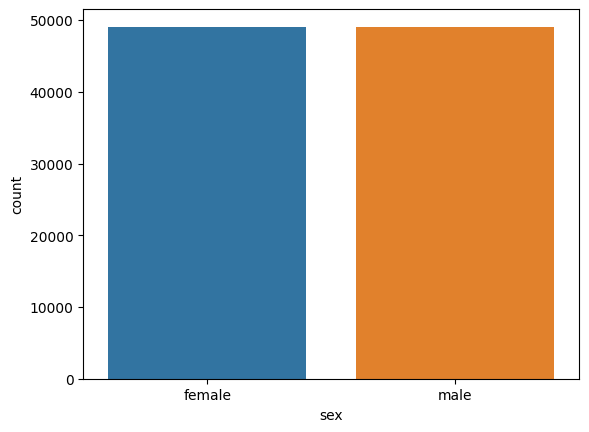

In [81]:
# Create a bar plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'sex', data = pandas_df)
# pandas_df.plot(kind='bar', x='sex', colormap='winter_r')
plt.show()

In [83]:
file_path2 = 'dataset/Fifa2018_dataset.csv'
# Load the Dataframe
fifa_df = spark.read.csv(file_path2, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [85]:
type(fifa_df)

pyspark.sql.dataframe.DataFrame

In [86]:
spark.catalog.listTables()

[Table(name='people', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [87]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



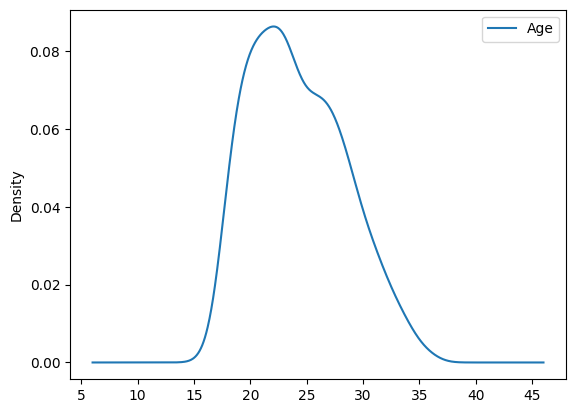

22/11/16 19:28:07 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1058355 ms exceeds timeout 120000 ms
22/11/16 19:28:07 WARN SparkContext: Killing executors is not supported by current scheduler.


In [90]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()


## PySpark MLlib algorithms

- Before using any Machine learning algorithms in PySpark shell, you'll have to import the submodules of pyspark.mllib library and then choose the appropriate class that is needed for a specific machine learning task.

- In this simple exercise, you'll learn how to import the different submodules of pyspark.mllib along with the classes that are needed for performing Collaborative filtering, Classification and Clustering algorithms.

In [96]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

# Import the library for Kmeans
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

## Loading Movie Lens dataset into RDDs

- Collaborative filtering is a technique for recommender systems wherein users' ratings and interactions with various products are used to recommend new ones. With the advent of Machine Learning and parallelized processing of data, Recommender systems have become widely popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags. In this 3-part exercise, your goal is to develop a simple movie recommendation system using PySpark MLlib using a subset of MovieLens 100k dataset.

- In the first part, you'll first load the MovieLens data `(ratings.csv)` into RDD and from each line in the RDD which is formatted as `userId,movieId,rating,timestamp`, you'll need to map the MovieLens data to a Ratings object `(userID, productID, rating)` after removing timestamp column and finally you'll split the RDD into training and test RDDs.

- Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the ratings.csv file), and ALS class are already available in your workspace.

In [117]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
file_path3 = 'dataset/ratings.csv'
# Load the data into RDD
data = sc.textFile(file_path3)

# Split the RDD -> Split the RDD using , as a delimiter.
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD -> For each line of the RDD, using Rating() class create a tuple of userID, productID, rating.
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
# training_data, test_data = ratings_final.randomSplit([0.8, 0.2])
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

## Model training and predictions

- After splitting the data into training and test data, in the second part of the exercise, you'll train the ALS algorithm using the training data. PySpark MLlib's ALS algorithm has the following mandatory parameters - rank (the number of latent factors in the model) and iterations (number of iterations to run). After training the ALS model, you can use the model to predict the ratings from the test data. For this, you will provide the user and item columns from the test dataset and finally return the list of 2 rows of `predictAll()` output.

- Remember, you have SparkContext `sc`, `training_data` and `test_data` are already available in your workspace.

In [118]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=6)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Return the first 2 rows of the RDD
predictions.take(2)

[Rating(user=222, product=3456, rating=2.665439429305899),
 Rating(user=547, product=6400, rating=3.291685925755481)]

## Model evaluation using MSE

- After generating the predicted ratings from the test data using ALS model, in this final part of the exercise, you'll prepare the data for calculating Mean Square Error (MSE) of the model. The MSE is the average value of `(original rating – predicted rating)**2` for all users and indicates the absolute fit of the model to the data. To do this, first, you'll organize both the ratings and prediction RDDs to make a tuple of ((user, product), rating)), then join the ratings RDD with prediction RDD and finally apply a squared difference function along with mean() to get the MSE.

Remember, you have a SparkContext sc available in your workspace. Also, ratings_final and predictions RDD are already available in your workspace.

In [123]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.25


## Loading spam and non-spam data

- Logistic Regression is a popular method to predict a categorical response. Probably one of the most common applications of the logistic regression is the message or email spam classification. In this 3-part exercise, you'll create an email spam classifier with logistic regression using Spark MLlib. Here are the brief steps for creating a spam classifier.

    * Create an RDD of strings representing email.
    * Run MLlib’s feature extraction algorithms to convert text into an RDD of vectors.
    * Call a classification algorithm on the RDD of vectors to return a model object to classify new points.
    * Evaluate the model on a test dataset using one of MLlib’s evaluation functions.

- In the first part of the exercise, you'll load the 'spam' and 'ham' (non-spam) files into RDDs, split the emails into individual words and look at the first element in each of the RDD.

- Remember, you have a SparkContext `sc` available in your workspace. Also `file_path_spam` variable (which is the path to the 'spam' file) and `file_path_non_spam` (which is the path to the 'non-spam' file) is already available in your workspace.

In [131]:
# Load the datasets into RDDs
file_path_spam = 'dataset/spam.csv'
file_path_non_spam = 'dataset/ham.csv'

spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)


# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.take(1))
print("The first element in non_spam_words is", non_spam_words.take(1))


The first element in spam_words is ['You']
The first element in non_spam_words is ['Rofl.']


In [127]:
print(type(file_path_spam))
print(type(spam_rdd))
print(type(spam_words))

<class 'str'>
<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.PipelinedRDD'>


## Feature hashing and LabelPoint

- After splitting the emails into words, our raw data set of 'spam' and 'non-spam' is currently composed of 1-line messages consisting of spam and non-spam messages. In order to classify these messages, we need to convert text into features.

- In the second part of the exercise, you'll first create a `HashingTF()` instance to map text to vectors of 200 features, then for each message in 'spam' and 'non-spam' files you'll split them into words, and each word is mapped to one feature. These are the features that will be used to decide whether a message is 'spam' or 'non-spam'. Next, you'll create labels for features. For a valid message, the label will be 0 (i.e. the message is not spam) and for a 'spam' message, the label will be 1 (i.e. the message is spam). Finally, you'll combine both the labeled datasets.

- Remember, you have a SparkContext `sc` available in your workspace. Also `spam_words` and `non_spam_words` variables are already available in your workspace.

In [198]:
# Create a HashingTf instance with 200 features
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import LabeledPoint

tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.join(non_spam_samples)


## Logistic Regression model training

- After creating labels and features for the data, we’re ready to build a model that can learn from it (training). But before you train the model, in this final part of the exercise, you'll split the data into training and test, run Logistic Regression model on the training data, and finally check the accuracy of the model trained on training data.

- Remember, you have a SparkContext sc available in your workspace, as well as the samples variable.

In [200]:
# Split the data into training and test
train_samples, test_samples = samples.randomSplit([0.8, 0.2])

In [ ]:
# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
# print("Model accuracy : {:.2f}".format(accuracy))

## Clustering

### Loading and parsing the 5000 points data

Clustering is the unsupervised learning task that involves grouping objects into clusters of high similarity. Unlike the supervised tasks, where data is labeled, clustering can be used to make sense of unlabeled data. PySpark MLlib includes the popular K-means algorithm for clustering. In this part, you'll find out how many clusters are there in a dataset containing 5000 rows and 2 columns. For this you'll first load the data into an RDD, parse the RDD based on the delimiter, run the KMeans model, evaluate the model and finally visualize the clusters.

In the first part, you'll load the data into RDD, parse the RDD based on the delimiter and convert the string type of the data to an integer.

Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the `5000_points.txt` file) is already available in your workspace.

In [212]:
file_path4 = '/Users/ssamilozkan/Desktop/pyspark/bigdata101_pyspark/dataset/5000_points.txt'

# Load the dataset into an RDD
clusterRDD = sc.textFile(file_path4)

# Split the RDD based on tab ->  splitting the lines based on the tab ("\t").
rdd_split = clusterRDD.map(lambda x: x.split('\t'))
rdd_split.take(2)




[['664159', '550946'], ['665845', '557965']]

In [214]:
# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
rdd_split_int.take(2)

[[664159, 550946], [665845, 557965]]

In [215]:
# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 5000 rows in the rdd_split_int dataset


### K-means training

- Now that the RDD is ready for training, in this 2nd part, you'll test with k's from 13 to 16 (to save computation time) and use the elbow method to chose the correct k. The idea of the elbow method is to run K-means clustering on the dataset for different values of k, calculate Within Set Sum of Squared Error (WSSSE) and select the best k based on the sudden drop in WSSSE. Next, you'll retrain the model with the best k and finally, get the centroids (cluster centers).

- Remember, you already have a SparkContext sc and `rdd_split_int` RDD available in your workspace.

In [218]:
# create error function to calculate the error
from math import sqrt
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [219]:
# Train the model with clusters from 13 to 16 and compute WSSSE

for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

The cluster 13 has Within Set Sum of Squared Error 252060331.1260039
The cluster 14 has Within Set Sum of Squared Error 215808893.2796594
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 168103213.0429197


In [225]:
# Train the model again with the best k
model = KMeans.train(rdd_split_int, k=16, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

## Visualizing clusters

- You just trained the k-means model with an optimum k value (k=15) and generated cluster centers (centroids). In this final exercise, you will visualize the clusters and the centroids by overlaying them. This will indicate how well the clustering worked (ideally, the clusters should be distinct from each other and centroids should be at the center of their respective clusters).

- To achieve this, you will first convert the rdd_split_int RDD into a Spark DataFrame, and then into Pandas DataFrame which can be used for plotting. Similarly, you will convert cluster_centers into a Pandas DataFrame. Once both the DataFrames are created, you will create scatter plots using Matplotlib.

- The SparkContext sc as well as the variables `rdd_split_int` and `cluster_centers` are available in your workspace.

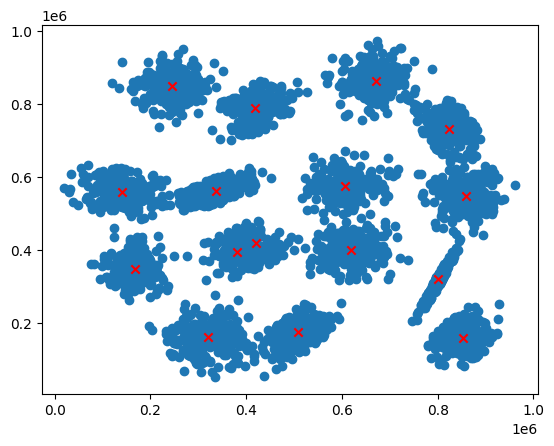

In [226]:
# Convert rdd_split_int RDD into Spark DataFrame and then to Pandas DataFrame
import pandas as pd
rdd_split_int_df_pandas = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"]).toPandas()

# Convert cluster_centers to a pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot of clusters and centroids
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()